In [1]:
#pip install opencv-python


In [2]:
#pip install tensorflow


In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Loading dataset

In [4]:
mnist= tf.keras.datasets.mnist

In [5]:
#trainning and testing
(x_train ,y_train),(x_test,y_test)=mnist.load_data()


In [6]:
#normalize
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test =tf.keras.utils.normalize(xtest,axis=1)

In [7]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.compile(optimizer= "adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])

C:\Users\Mike\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#train the model
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8685 - loss: 0.4729
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9657 - loss: 0.1133
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9779 - loss: 0.0691
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9841 - loss: 0.0489
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9894 - loss: 0.0337


In [9]:
#save 
model.save('handwrittenmodel.keras')

In [10]:
model=tf.keras.models.load_model('handwrittenmodel.keras')

In [11]:
loss,accuracy =model.evaluate(x_test,y_test)
print("loss: ", loss)
print("accuracy: ", accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9693 - loss: 0.1114
loss:  0.09808804839849472
accuracy:  0.9722999930381775


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
This digit is probably a 0


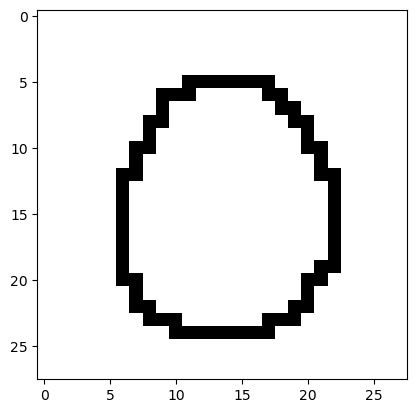

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
This digit is probably a 1


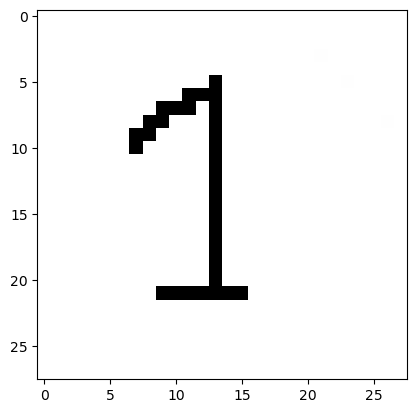

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
This digit is probably a 2


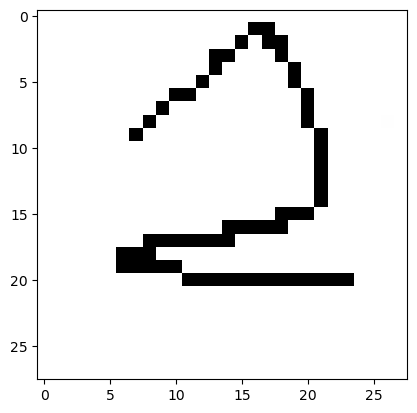

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
This digit is probably a 3


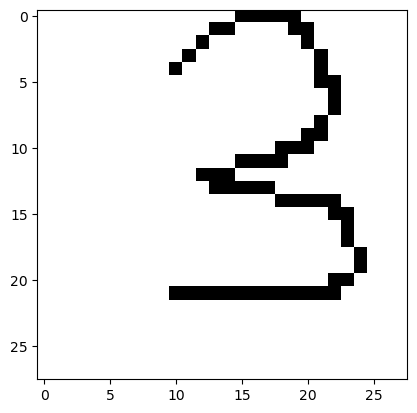

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
This digit is probably a 1


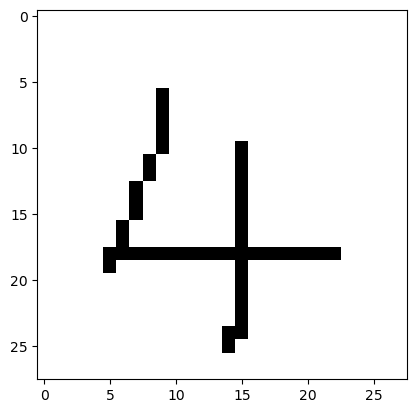

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
This digit is probably a 5


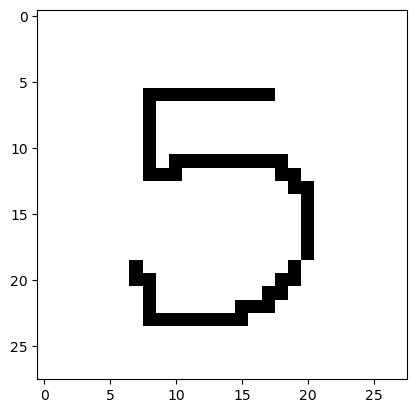

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
This digit is probably a 3


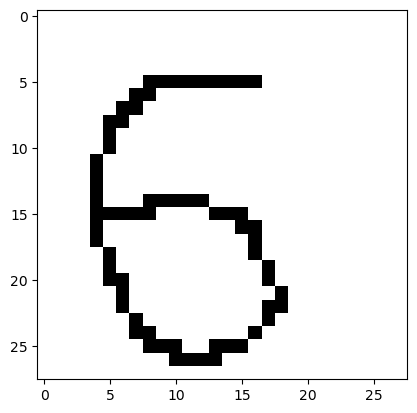

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
This digit is probably a 2


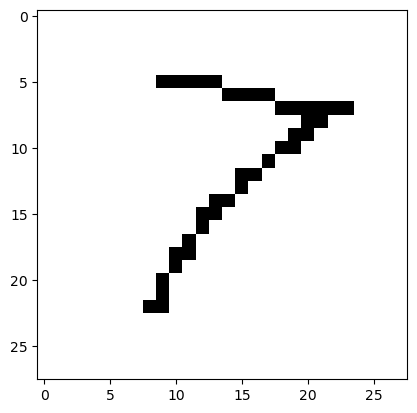

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
This digit is probably a 8


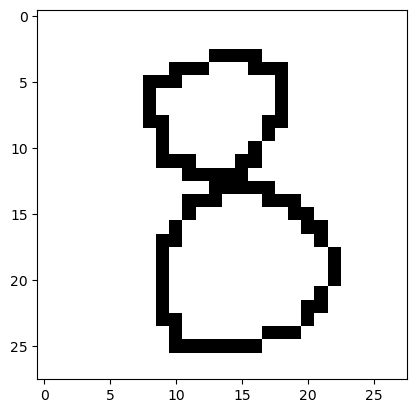

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
This digit is probably a 3


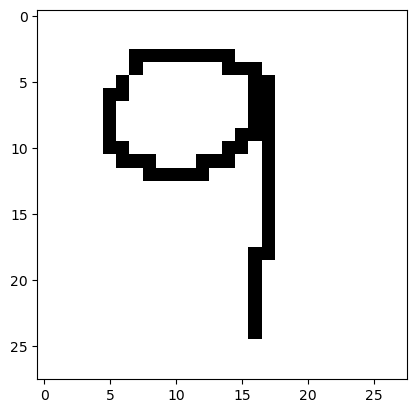

In [12]:
#predict the number of the following
image_number=0
while os.path.isfile(f"digits/{image_number}-digit.png"):
    try:
        img=cv2.imread(f"digits/{image_number}-digit.png")[:,:,0]
        img=np.invert(np.array([img]))
        prediction=model.predict(img)
        print(f"This digit is probably a {np.argmax(prediction)}")
        plt.imshow(img[0],cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error!")
    finally:
        image_number += 1
        
        
                      
                      
        